In [4]:
from datasets import load_dataset
import ast
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
df=load_dataset('lukebarousse/data_jobs',split='train').to_pandas()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/usr/local/python/3.12.1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 100%|██████████| 785741/785741 [00:05<00:00, 151691.39 examples/s]


In [ ]:
#Intro to DataFrames
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

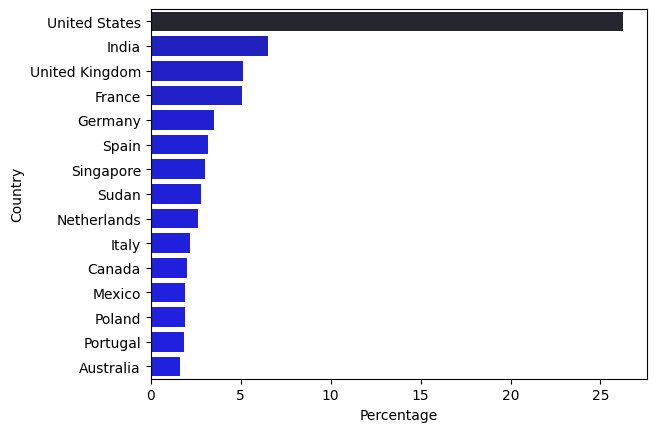

In [6]:
df_plot=df['job_country'].value_counts().reset_index(name='Count').rename(columns={'job_country':'Country'})
size=len(df)
df_plot['Percentage']=(df_plot['Count']/size)*100
sns.barplot(data=df_plot.head(15),x='Percentage',y='Country',legend=False,palette='dark:b_r',hue='Percentage')
plt.show()

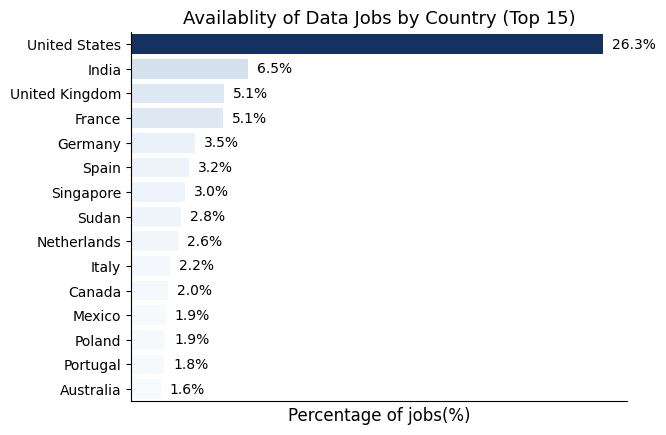

In [ ]:
#Optimized bar plot for better visualization
sns.barplot(data=df_plot.head(15),x='Percentage',y='Country',legend=False,palette='Blues',hue='Percentage')
for i,v in enumerate(df_plot['Percentage'].head(15)):
    plt.text(v+0.5,i,f'{v:.1f}%',va='center')
plt.title('Availablity of Data Jobs by Country (Top 15)',fontsize=13)
plt.xlabel('Percentage of jobs(%)',fontsize=12)
plt.ylabel('')
plt.xticks([])
plt.yticks(fontsize=10)
sns.despine()
plt.show()

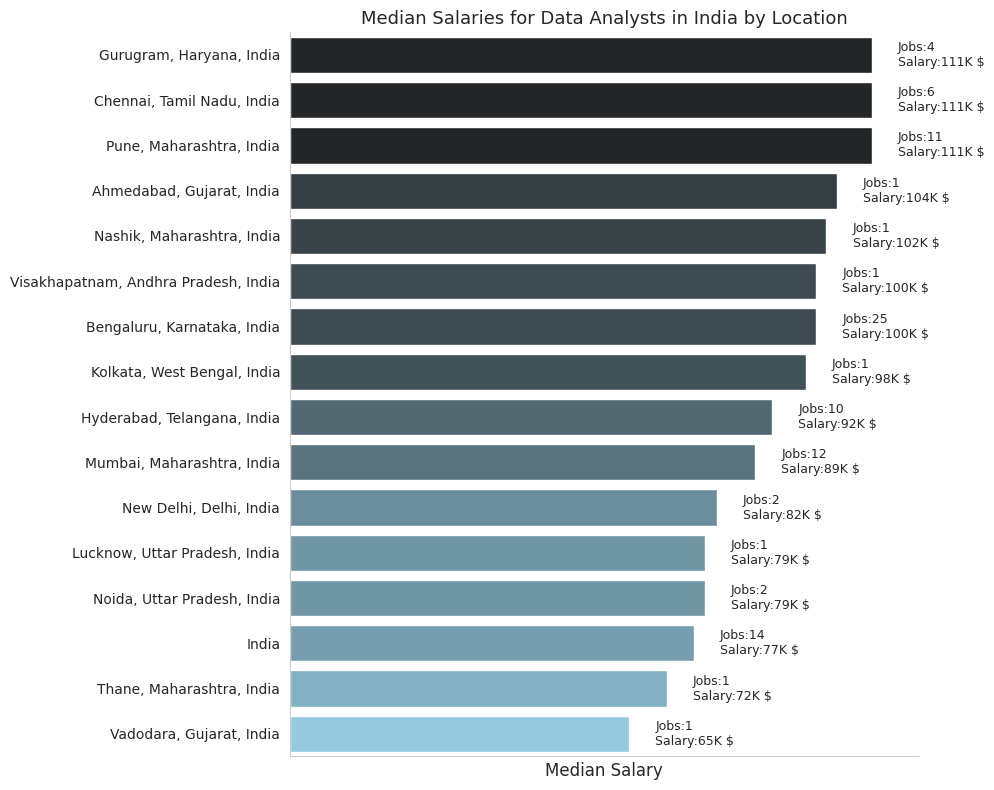

In [11]:
from matplotlib.ticker import FuncFormatter
df_da_in=df[(df['job_country']=='India') &  (df['job_title_short']=='Data Analyst')].copy()
df_da_in.dropna(subset=['salary_year_avg'],inplace=True)
df_plot=df_da_in.groupby('job_location')['salary_year_avg'].agg(['count','median']).reset_index().sort_values(by='median',ascending=False)
df_plot.drop(1,inplace=True)
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(data=df_plot, x='median', y='job_location', legend=False, palette ='dark:skyblue_r', ax=ax, hue= 'median')

# Format x-axis using FuncFormatter
def format_salary(x, pos):
    """Format salary values to compact K format"""
    if x >= 1000:
        return f'{x/1000:.0f}K'
    else:
        return f'{x:.0f}'

ax.xaxis.set_major_formatter(FuncFormatter(format_salary))

for i, (u,v) in enumerate(zip(df_plot['count'],df_plot['median'])):
    ax.text(v+5000, i, f'Jobs:{u} \nSalary:{format_salary(v,0)} $', va='center', fontsize=9)
ax.set_title('Median Salaries for Data Analysts in India by Location', fontsize=13)
ax.set_xlabel('Median Salary', fontsize=12)
ax.set_ylabel('')
ax.tick_params(axis='y', labelsize=10)
ax.set_xlim(0,120000)
ax.set_xticks([])
sns.despine()
plt.tight_layout()
plt.show()

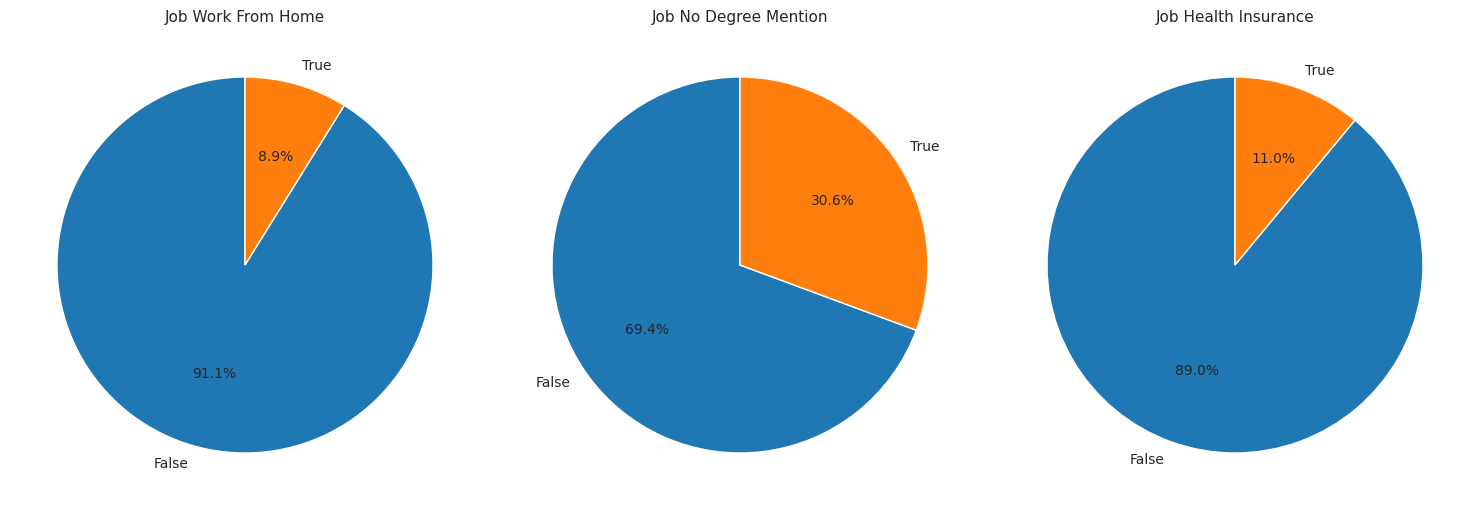

In [ ]:

cols = ['job_work_from_home', 'job_no_degree_mention', 'job_health_insurance']
sns.set_style("whitegrid")
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, col in zip(axes, cols):
    values = df[col].value_counts()
    ax.pie(
        values,
        labels=values.index.astype(str),
        autopct='%1.1f%%',
        startangle=90
    )
    ax.set_title(col.replace('_', ' ').title(), fontsize=11)

plt.tight_layout()
plt.show()
